In [1]:
!pip install Bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 20.6 MB/s eta 0:00:00


In [2]:
!apt-get install muscle

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  muscle
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 244 kB of archives.
After this operation, 709 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 muscle amd64 1:3.8.1551-2build1 [244 kB]
Fetched 244 kB in 0s (881 kB/s)
Selecting previously unselected package muscle.
(Reading database ... 121654 files and directories currently installed.)
Preparing to unpack .../muscle_1%3a3.8.1551-2build1_amd64.deb ...
Unpacking muscle (1:3.8.1551-2build1) ...
Setting up muscle (1:3.8.1551-2build1) ...
Processing triggers for man-db (2.10.2-1) ...


In [3]:
import Bio as Bio

In [4]:
#import our three important packages
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo

In [5]:
p1 = SeqIO.parse(open("cat.fna"), "fasta")
p2 = SeqIO.parse(open("tiger.fna"), "fasta")
p3 = SeqIO.parse(open("lion.fna"), "fasta")
p4 = SeqIO.parse(open("leopard.fna"), "fasta")
p5 = SeqIO.parse(open("chimpanzee.fna"), "fasta")
p6 = SeqIO.parse(open("cow.fna"), "fasta")
p7 = SeqIO.parse(open("dog.fna"), "fasta")
p8 = SeqIO.parse(open("horse.fna"), "fasta")
p9 = SeqIO.parse(open("human.fna"), "fasta")
p10 = SeqIO.parse(open("rat.fna"), "fasta")

In [6]:
p1.id = 'cat'
p2.id = 'tiger'
p3.id = 'lion'
p4.id = 'leopard'
p5.id = 'chimpanzee'
p6.id = 'cow'
p7.id = 'dog'
p8.id = 'horse'
p9.id = 'human'
p10.id = 'rat'

In [7]:
p1.id

'cat'

In [8]:
combined_seqs = list(p1) + list(p2) + list(p3) + list(p4) + list(p5) + list(p6) + list(p7) + list(p8) + list(p9) + list(p10)
SeqIO.write(combined_seqs, "combined_sequence.fna", "fasta")

345

In [21]:
from Bio import SeqIO
from Bio.Align import MultipleSeqAlignment
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

def convert_fasta_to_clustal(input_fasta, output_clustal, species_names):
    # Parse the input FASTA file
    records = list(SeqIO.parse(open(input_fasta), "fasta"))

    # Ensure all sequences have the same length
    min_length = min(len(record.seq) for record in records)

    # Create SeqRecord objects with trimmed/padded sequences and specified species names
    trimmed_records = [SeqRecord(Seq(str(record.seq)[:min_length]), id=species_name) for record, species_name in zip(records, species_names)]

    # Create a MultipleSeqAlignment object
    alignment = MultipleSeqAlignment(trimmed_records)

    # Write the alignment to the output CLUSTAL file
    with open(output_clustal, 'w') as clustal_file:
        SeqIO.write(alignment, clustal_file, 'clustal')

# Replace these paths with your actual file paths
input_combined_fasta_path = 'combined_sequence.fna'
output_clustal_path = 'align.clw'

# Specify the species names corresponding to each sequence
species_names = ['cat', 'tiger','lion','leopard','horse','cow','dog','chimpanzee','human','rat']

# Call the function to convert FASTA to CLUSTAL for combined sequences
convert_fasta_to_clustal(input_combined_fasta_path, output_clustal_path, species_names)

In [22]:
# Open the alignment file as a MultipleSeqAlignment object
with open("align.clw","r") as clw:
    alignment = AlignIO.read(clw,"clustal")
print(type(alignment))

<class 'Bio.Align.MultipleSeqAlignment'>


In [23]:
# Open and initiate the Distance Calculator using the Identity model
from Bio.Phylo.TreeConstruction import DistanceCalculator
calculator = DistanceCalculator('identity')

In [24]:
# Write the Distance Matrix
distance_matrix = calculator.get_distance(alignment)
print(distance_matrix)

cat 0.000000
tiger   0.794177    0.000000
lion    0.814926    0.792838    0.000000
leopard 0.793842    0.775100    0.801874    0.000000
horse   0.826305    0.803213    0.805221    0.807564    0.000000
cow 0.823293    0.801874    0.823628    0.807898    0.828648    0.000000
dog 0.821285    0.801205    0.801539    0.815596    0.822624    0.817938    0.000000
chimpanzee  0.808568    0.803548    0.807564    0.810910    0.824297    0.816600    0.809906    0.000000
human   0.830321    0.804217    0.809237    0.800870    0.825971    0.820616    0.827644    0.789826    0.000000
rat 0.804552    0.805221    0.809572    0.810241    0.825636    0.834337    0.818273    0.816934    0.792838    0.000000
    cat tiger   lion    leopard horse   cow dog chimpanzee  human   rat


In [25]:
# Create a DistanceTreeConstructor object
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor()
# Construct the phlyogenetic tree using UPGMA algorithm
UPGMATree = constructor.upgma(distance_matrix)

{'cow': 0.41229501338688085, 'Inner8': 0.0036604752342704328, 'horse': 0.4086345381526104, 'Inner7': 0.006191432396251639, 'Inner4': 0.005292001338688068, 'dog': 0.4007697456492637, 'lion': 0.4007697456492637, 'Inner6': 0.0036186412315930006, 'Inner5': 0.0021335341365461558, 'rat': 0.4024431057563588, 'Inner2': 0.0075301204819276935, 'human': 0.3949129852744311, 'chimpanzee': 0.3949129852744311, 'Inner3': 0.00757195448460507, 'Inner1': 0.009454484605087021, 'leopard': 0.38755020080321284, 'tiger': 0.38755020080321284, 'cat': 0.39700468540829986}


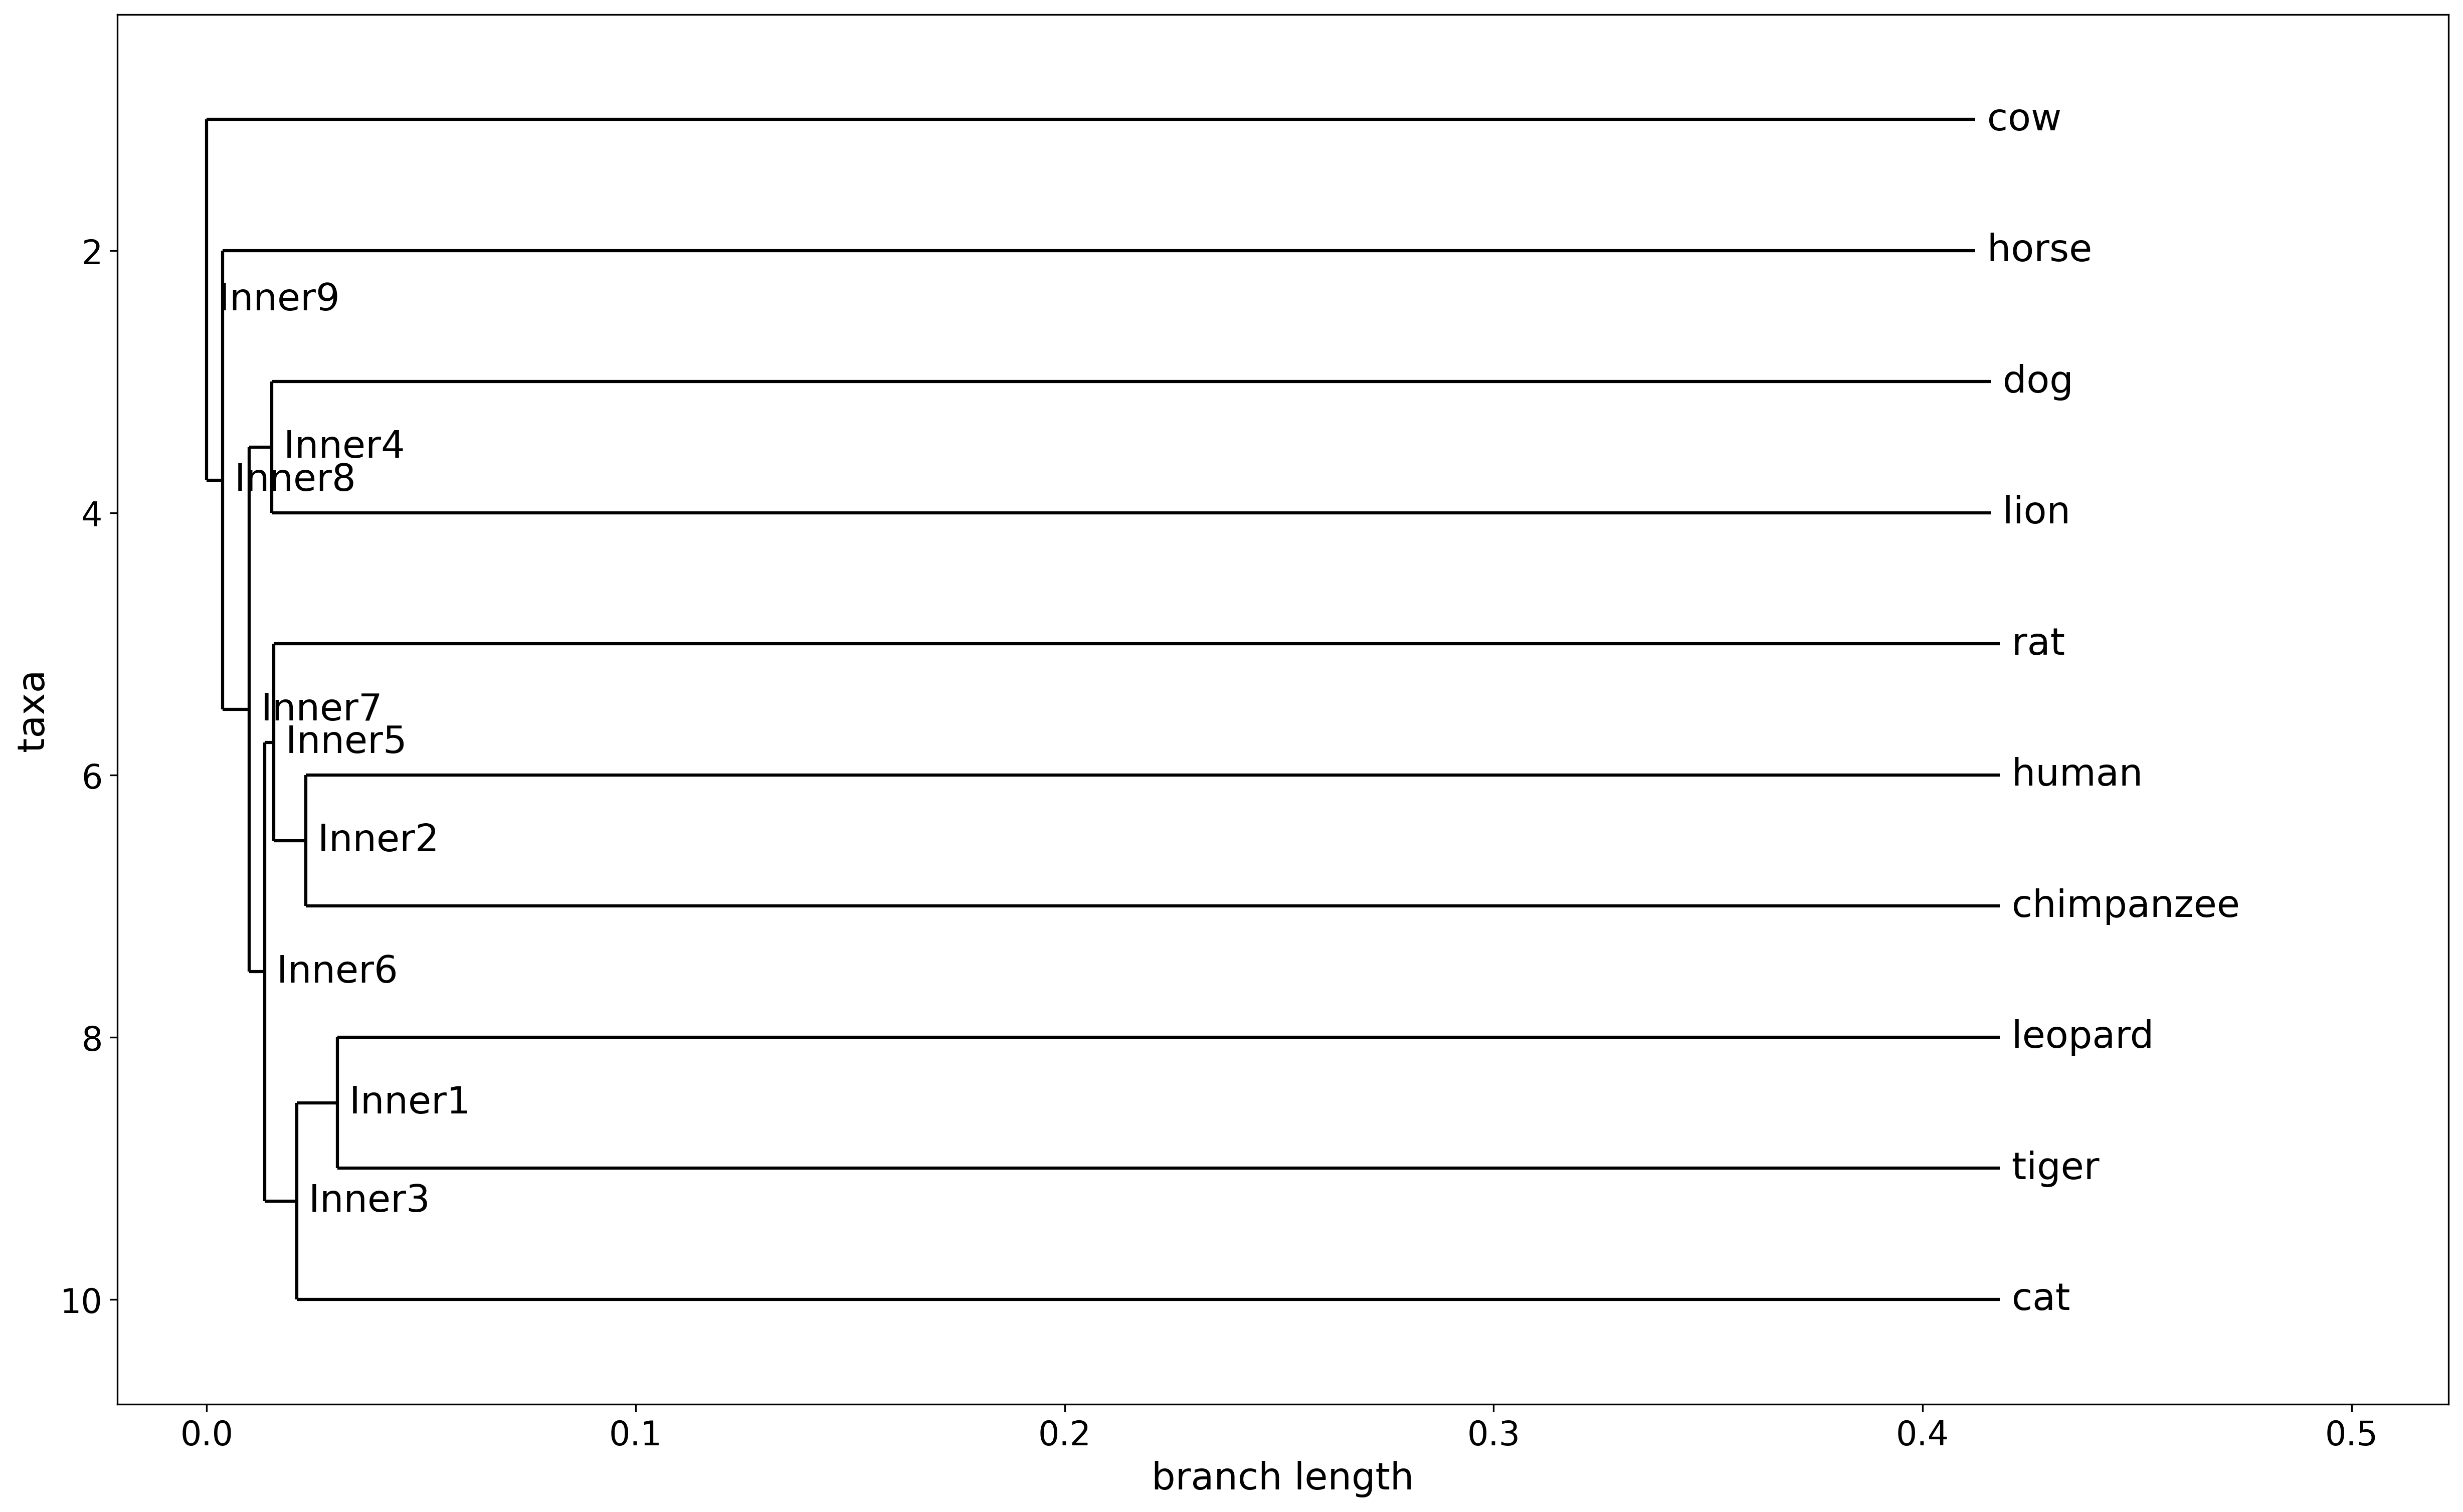

In [26]:
# Make a better looking tree using the features of matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 12), dpi=300) # create figure & set the size
plt.rc('font', size=18)              # fontsize of the leaf and node labels
plt.rc('xtick', labelsize=16)       # fontsize of the tick labels
plt.rc('ytick', labelsize=16)       # fontsize of the tick labels
axes = fig.add_subplot(1, 1, 1)
def calculate_branch_lengths(tree):
    branch_lengths = {}
    for clade in tree.find_clades():
        if clade.branch_length:
            branch_lengths[clade.name] = clade.branch_length
    return branch_lengths

# Calculate branch lengths
branch_lengths = calculate_branch_lengths(UPGMATree)
print(branch_lengths)
# drawing the tree
Phylo.draw(UPGMATree, axes=axes)
fig.savefig("UPGMATree")

In [27]:
UPGMATree.common_ancestor('tiger','leopard')

Clade(branch_length=0.009454484605087021, name='Inner1')

In [28]:
UPGMATree.get_terminals()

[Clade(branch_length=0.41229501338688085, name='cow'),
 Clade(branch_length=0.4086345381526104, name='horse'),
 Clade(branch_length=0.4007697456492637, name='dog'),
 Clade(branch_length=0.4007697456492637, name='lion'),
 Clade(branch_length=0.4024431057563588, name='rat'),
 Clade(branch_length=0.3949129852744311, name='human'),
 Clade(branch_length=0.3949129852744311, name='chimpanzee'),
 Clade(branch_length=0.38755020080321284, name='leopard'),
 Clade(branch_length=0.38755020080321284, name='tiger'),
 Clade(branch_length=0.39700468540829986, name='cat')]

In [29]:
UPGMATree.get_nonterminals()

[Clade(branch_length=0, name='Inner9'),
 Clade(branch_length=0.0036604752342704328, name='Inner8'),
 Clade(branch_length=0.006191432396251639, name='Inner7'),
 Clade(branch_length=0.005292001338688068, name='Inner4'),
 Clade(branch_length=0.0036186412315930006, name='Inner6'),
 Clade(branch_length=0.0021335341365461558, name='Inner5'),
 Clade(branch_length=0.0075301204819276935, name='Inner2'),
 Clade(branch_length=0.00757195448460507, name='Inner3'),
 Clade(branch_length=0.009454484605087021, name='Inner1')]

In [30]:
UPGMATree.count_terminals()

10

In [31]:
UPGMATree.total_branch_length()

4.032295850066935

In [32]:
# Construct the phlyogenetic tree using NJ algorithm
NJTree = constructor.nj(distance_matrix)
# Draw the phlyogenetic tree using terminal
Phylo.draw_ascii(NJTree)

  _______________________________________________________________ cow
 |
 |_______________________________________________________________ cat
 |
 | ____________________________________________________________ leopard
 ||
 ||___________________________________________________________ tiger
 |
_|________________________________________________________________ horse
 |
 | ______________________________________________________________ dog
 ||
 ||_____________________________________________________________ lion
 |
 |  _____________________________________________________________ rat
 |_|
 | |_____________________________________________________________ human
 |
 |______________________________________________________________ chimpanzee



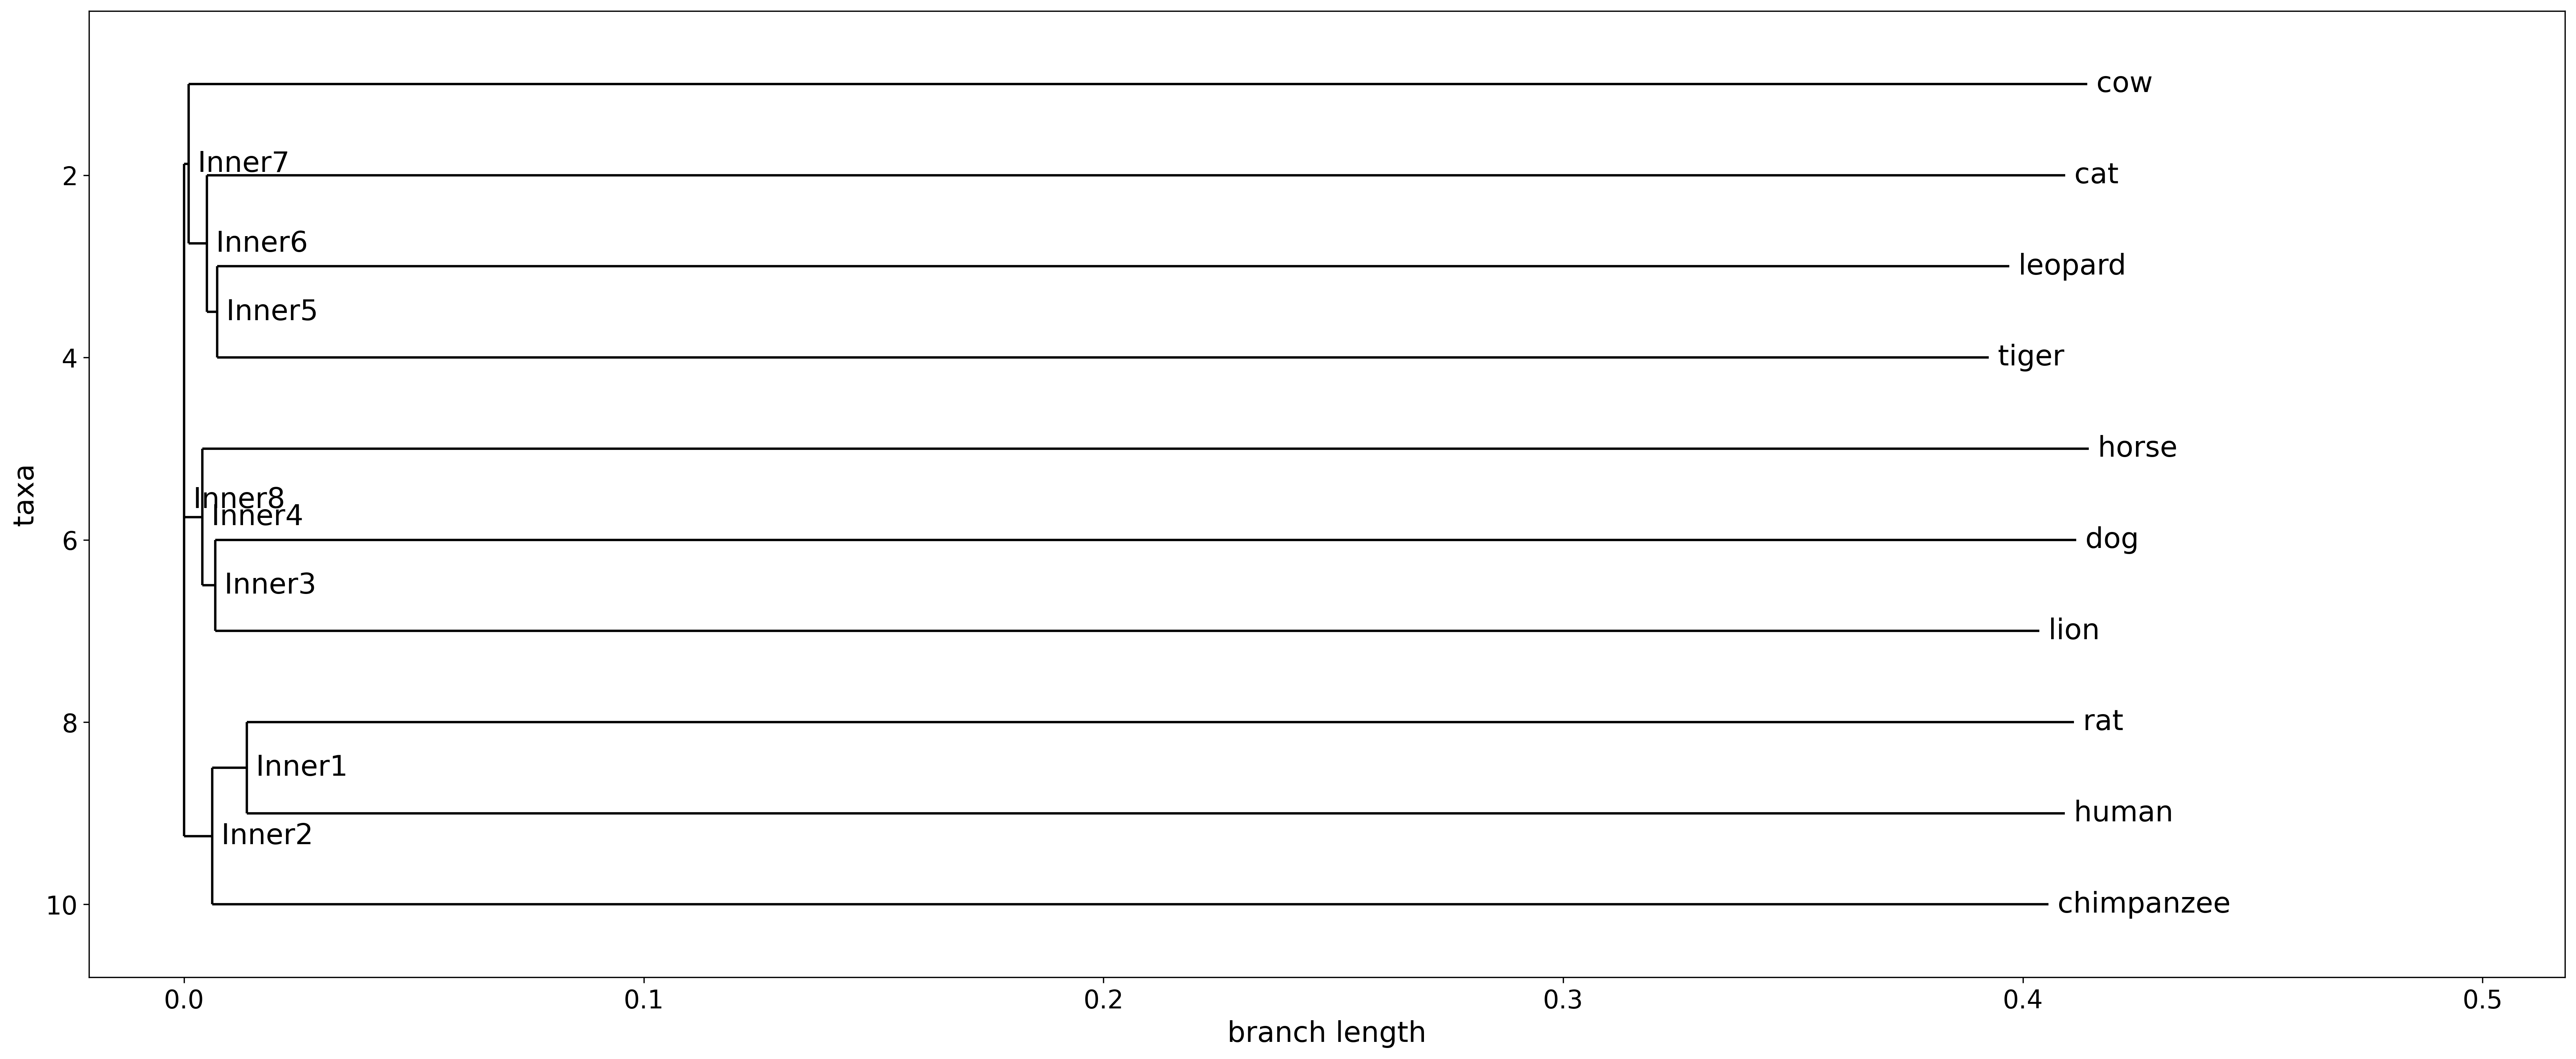

In [33]:
# Make a better looking tree using the features of matplotlib

fig = plt.figure(figsize=(28, 11), dpi=300) # create figure & set the size
# matplotlib.rc('font', size=18)              # fontsize of the leaf and node labels
# matplotlib.rc('xtick', labelsize=16)       # fontsize of the tick labels
# matplotlib.rc('ytick', labelsize=16)       # fontsize of the tick labels

# Calculate branch lengths
branch_lengths = calculate_branch_lengths(NJTree)

axes = fig.add_subplot(1, 1, 1)
Phylo.draw(NJTree, axes=axes)

fig.savefig("NJTree")